<a href="https://colab.research.google.com/github/akdubey/AKDU/blob/main/Copy_of_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc. You first need to import the os module to interact with the underlying operating system
import os

In [2]:
# Mount Your Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dirname = '/content/drive/My Drive/Research/diabetes.csv'

In [4]:
# Importing libraries
# Pandas is an open-source library that is made mainly for working with relational or labeled data both easily and intuitively. It provides various data structures and operations for manipulating numerical data and time series. 
#The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
import pandas as pd
import numpy as np
from sklearn import preprocessing
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/content/drive/My Drive/Research/diabetes.csv')

In [6]:
df =pd.DataFrame(data=data)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <a list of 10 Patch objects>)

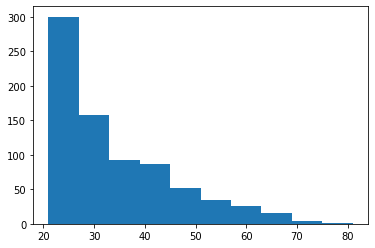

In [7]:
plt.hist(df['Age'])

In [8]:
## Head shows first 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
## Head shows first 10 rows
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
# tail shows last 5 rows
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
#The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
#Let's check the duplicate data in data set
data.duplicated().sum()

0

In [13]:
#The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# As per observation, there are lot of 0s present in the dataset. It is better to replace zeros with NaN and after that counting them would be easier and 0s need to be replaced with suitable values.

data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [15]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab98024f50>,
      dtype=object)

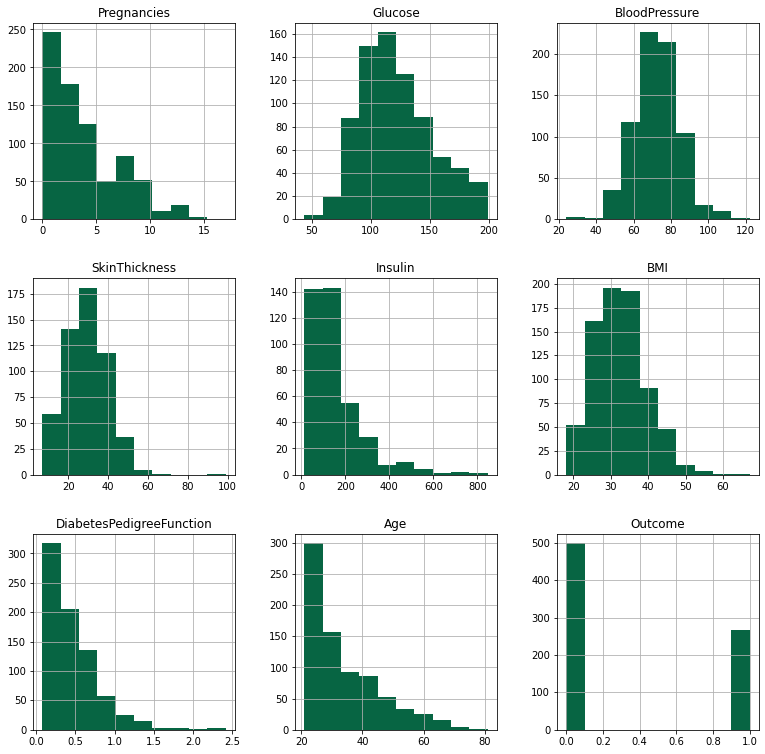

In [16]:
# Fill the zeros with Nan values
data.hist(figsize = (13,13), color="#076543")

In [17]:
# replace NaN values for the columns in accordance with their distribution
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

In [18]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
#corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. Note: The correlation of a variable with itself is 1.
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [20]:
# columns gives column names of features
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
# shape gives number of rows and columns in a tuble
data.shape

(768, 9)

In [22]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [23]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
#The dtypes property is used to find the dtypes in the DataFrame. This returns a Series with the data type of each column.
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

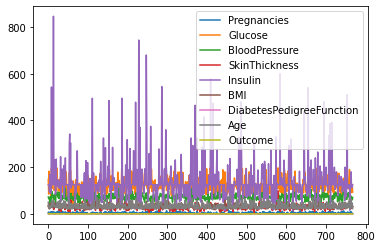

In [25]:
# Plotting all data 
data1 = data.loc[:,["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]]
data1.plot()

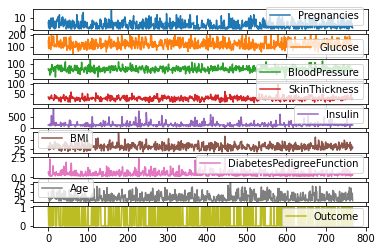

In [26]:
# subplots
data1.plot(subplots = True)
plt.show()

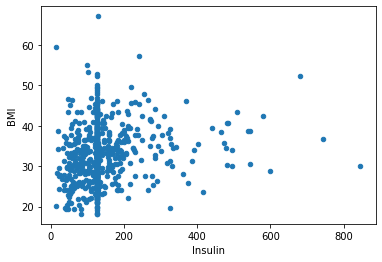

In [27]:
# scatter plot: A scatter plot is a diagram where each value in the data set is represented by a dot. 
data1.plot(kind = "scatter",x="Insulin",y = "BMI")
plt.show()

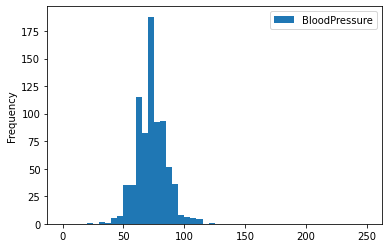

In [28]:
# hist plot : A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.
data1.plot(kind = "hist",y = "BloodPressure",bins = 50,range= (0,250))

In [29]:
# pandas, a missing value is denoted by NaN
data1.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [30]:
# get the number of missing data points per column
missing_values_count = data1.isnull().sum()

In [31]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
# feature selection
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = data1[feature_cols]
y = data1.Outcome

In [33]:
# remove all the rows that contain a missing value
data1.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [34]:
# remove all columns with at least one missing value
columns_with_na_dropped = data1.dropna(axis=1)
columns_with_na_dropped.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [35]:
# Selecting features - [Glucose, Insulin, BMI]
X = data1.iloc[:, [1, 4, 5]].values
Y = data1.iloc[:, 8].values

In [42]:
# Splitting X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2, stratify = data1['Outcome'] )

In [43]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (576, 3)
X_test shape: (192, 3)
Y_train shape: (576,)
Y_test shape: (192,)


In [44]:
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [45]:
#prediction using kmeans and accuracy
kpred = KMeans_Clustering.predict(X_test)

print('Classification report:\n\n', sklearn.metrics.classification_report(Y_test,kpred))

Classification report:

               precision    recall  f1-score   support

           0       0.67      0.98      0.80       125
           1       0.73      0.12      0.21        67

    accuracy                           0.68       192
   macro avg       0.70      0.55      0.50       192
weighted avg       0.69      0.68      0.59       192



Confusion Matrix :


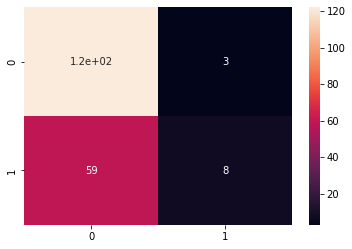

In [46]:
#confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
print("Confusion Matrix :")
outcome_labels = sorted(data.Outcome.unique())
sns.heatmap(
    confusion_matrix(Y_test, kpred),
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

In [48]:
# Confusion Matrix
#TP (True Positive)
#FP (False Positive)
#TN (True Negative)
#FN (False Negative)
#True Positive: Actually positive (ground truth), predicted as positive (correctly classified)
#True Negative: Actually negative (ground truth), predicted as negative (correctly classified)
#False Positive: Actually negative (ground truth), predicted as positive (misclassified)
#False Negative: Actually positive (ground truth), predicted as negative (misclassified)

In [50]:
#F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
#Precision: Correct positive predictions relative to total positive predictions
#Recall: Correct positive predictions relative to total actual positives